[TUTORIAL](https://www.youtube.com/watch?v=gCWBFyFTxVU)

In [0]:
from google.colab import drive
# drive.mount('/content/drive')

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
link = "/content/drive/My Drive/Colab Notebooks/creditcard.csv"

data = pd.read_csv(link)

In [22]:
print(data.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [23]:
print(data.shape)

(284807, 31)


In [25]:
print(data.describe())

                Time            V1  ...         Amount          Class
count  284807.000000  2.848070e+05  ...  284807.000000  284807.000000
mean    94813.859575  3.919560e-15  ...      88.349619       0.001727
std     47488.145955  1.958696e+00  ...     250.120109       0.041527
min         0.000000 -5.640751e+01  ...       0.000000       0.000000
25%     54201.500000 -9.203734e-01  ...       5.600000       0.000000
50%     84692.000000  1.810880e-02  ...      22.000000       0.000000
75%    139320.500000  1.315642e+00  ...      77.165000       0.000000
max    172792.000000  2.454930e+00  ...   25691.160000       1.000000

[8 rows x 31 columns]


In [26]:
data = data.sample(frac=0.1, random_state=1)

print(data.shape)

(28481, 31)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7b698d1518>,
      dtype=object)

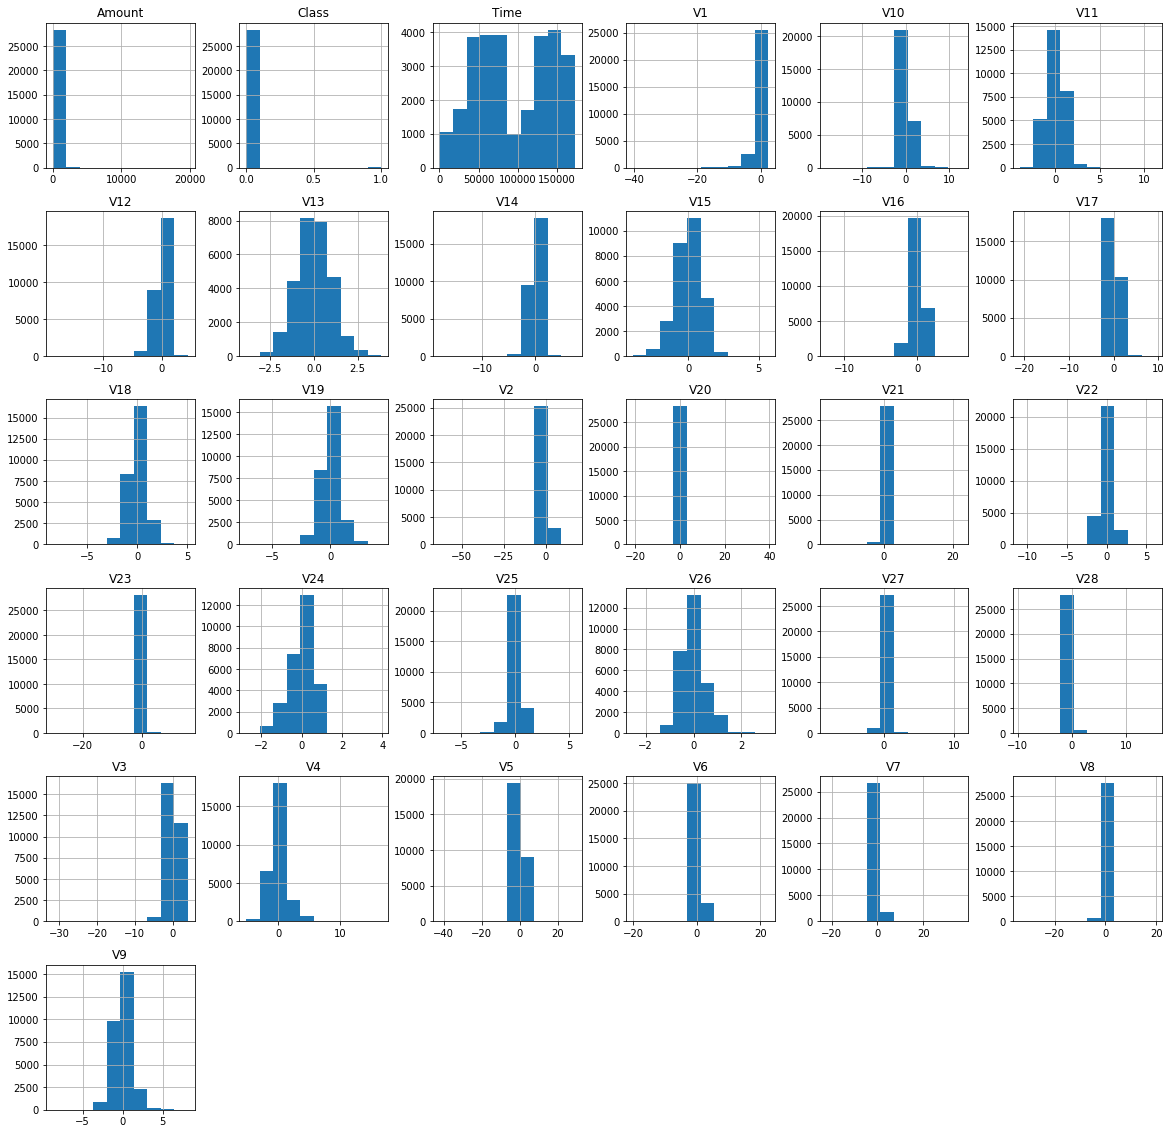

In [27]:
data.hist(figsize=(20, 20))

In [29]:
fraud = data[data["Class"] == 1]
valid = data[data["Class"] == 0]

oulier_fraction = len(fraud) / float(len(valid))
print(oulier_fraction)

print("fraud cases: ", format(len(fraud)))
print("valid cases: ", format(len(valid)))

0.0017234102419808666
fraud cases:  49
valid cases:  28432


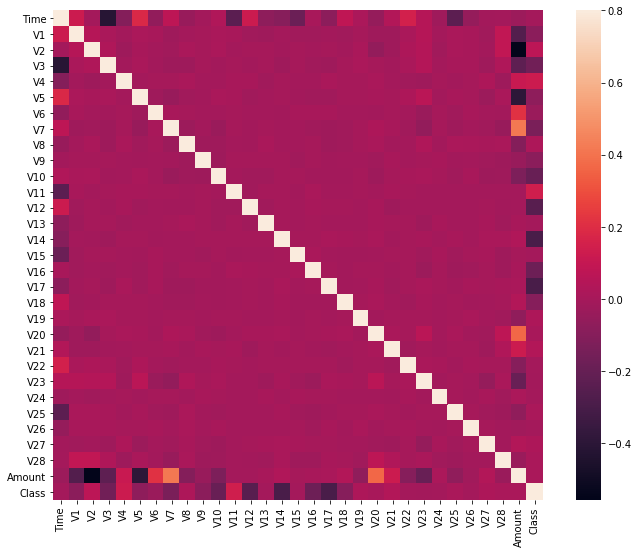

In [30]:
# correlation matrix
corrmat = data.corr()
fig = plt.figure(figsize=(12, 9))

sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

In [32]:
# gettig all thr columns drom the dataframe
columns = data.columns.tolist()

columns = [c for c in columns if c not in ["Class"]]

target = "Class"

X = data[columns]
Y = data[target]

print(X.shape)
print(Y.shape)

(28481, 30)
(28481,)


# UNSUPERVISED OUTLIER DETECTION
Po przetworzeniu danych można rozpocząć wdrażanie algorytmów ML. Techniki:

**Lokalny współczynnik odstający (Local Outlier Factor, LOF)**

Wynik anomalii dla każdej próbki nazywa się lokalnym współczynnikiem odstającym (Local utlier Factor). Mierzy lokalne odchylenie gęstości danej próbki w stosunku do jej sąsiadów. Jest lokalny, ponieważ wynik anomalii zależy od tego, jak izolowany jest obiekt w stosunku do otaczającej okolicy.

**Algorytm lasu izolacyjnego (Isolation Forest Algorithm)**

IsolationForest „izoluje” obserwacje przez losowy wybór elementu, a następnie losowy wybór wartości podziału między wartościami maksymalną i minimalną wybranej cechy.

Ponieważ partycjonowanie rekurencyjne może być reprezentowane przez strukturę drzewa, liczba podziałów wymagana do wyizolowania próbki jest równoważna długości ścieżki od węzła głównego do węzła końcowego.

Ta długość ścieżki, uśredniona w lesie takich przypadkowych drzew, jest miarą normalności i naszej funkcji decyzyjnej.

Losowe partycjonowanie powoduje zauważalnie krótsze ścieżki anomalii. Dlatego też, gdy las przypadkowych drzew wspólnie wytwarza krótsze ścieżki dla poszczególnych próbek, najprawdopodobniej są to anomalie.

In [0]:
# UNSUPERVISED OUTLIER DETECTION

from sklearn.metrics import  classification_report, accuracy_score
from sklearn.ensemble import  IsolationForest
from sklearn.neighbors import  LocalOutlierFactor

# define random states
state = 1

# define outlier deetection tools to be compared
classifiers = {
    "Isolation Forest": IsolationForest(max_samples=len(X),
                                        contamination=oulier_fraction,
                                        random_state=state),
    "Local Outlier Factor": LocalOutlierFactor(n_neighbors=20,
                                               contamination=oulier_fraction)
}

In [40]:
# fit the model
plt.figure(figsize=(9,7))
n_outliers = len(fraud)

for i, (clf_name, clf) in enumerate(classifiers.items()):

  # fit the data and tag outliers
  if clf_name == "Local Outlier Factor":
    y_pred = clf.fit_predict(X)
    scores_pred = clf.negative_outlier_factor_
  else:
    clf.fit(X)
    scores_pred = clf.decision_function(X)
    y_pred = clf.predict(X)

  # reshape prediction values to 0 for validd, 1 for fraud
  y_pred[y_pred == 1] = 0
  y_pred[y_pred == -1] = 1

  n_errors = (y_pred !=Y).sum()

  # classification metrics
  print('{}: {}'.format(clf_name, n_errors))
  print(accuracy_score(Y, y_pred))
  print(classification_report(Y, y_pred))
  

Isolation Forest: 71
0.99750711000316
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.28      0.29      0.28        49

    accuracy                           1.00     28481
   macro avg       0.64      0.64      0.64     28481
weighted avg       1.00      1.00      1.00     28481

Local Outlier Factor: 97
0.9965942207085425
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.02      0.02      0.02        49

    accuracy                           1.00     28481
   macro avg       0.51      0.51      0.51     28481
weighted avg       1.00      1.00      1.00     28481



<Figure size 648x504 with 0 Axes>